In [1]:
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams["axes.labelsize"] = 18
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['axes.titlesize'] = 22
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['pdf.fonttype'] = 42
# mpl.rcParams['ps.fonttype'] = 42

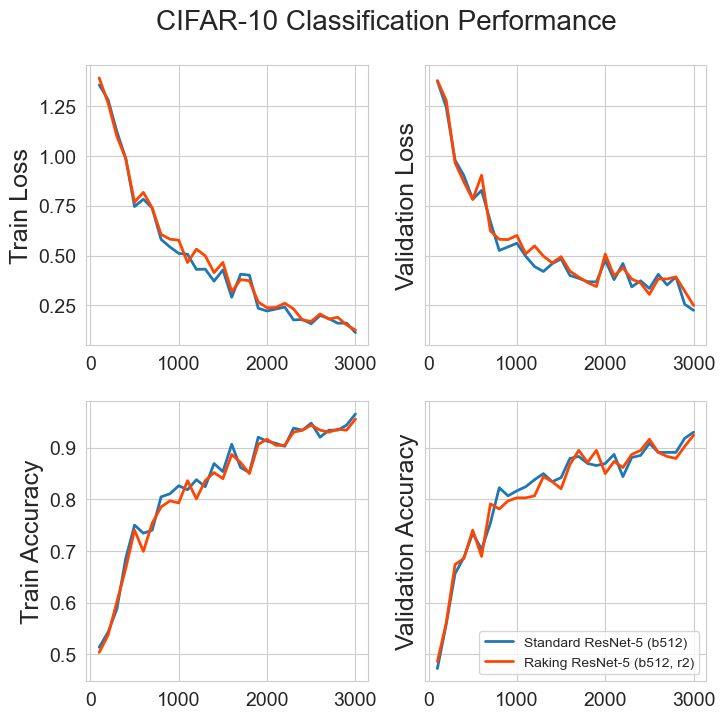

In [27]:
seed = 0
exp_names = {
    "resnet_default": "Standard ResNet-5 (b512)",
    "resnet_raking":  "Raking ResNet-5 (b512, r2)"
}

res_dir = "../logs/resnet"
losses = {name: {"train_loss": [], "validation_loss": [], "train_accuracy": [], "validation_accuracy": []} for name in exp_names}
for name in exp_names:
    for i in range(100, 3001, 100):
        with open(os.path.join(res_dir, f'{name}/{seed}/step_{i}.json'), "r") as f:
            res = json.load(f)
            for key in res:
                losses[name][key].append(res[key])

sns.set_style("whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(8, 8), sharey="row")

cols = {
    "resnet_default": "tab:blue",
    "resnet_raking":  "orangered"
}

for name in exp_names:
    x = list(range(100, 3001, 100))

    y = np.array(losses[name]['train_loss'])
    ax[0, 0].plot(x, y, label=exp_names[name], color=cols[name])
    ax[0, 0].set_ylabel('Train Loss')

    y = np.array(losses[name]['validation_loss'])
    ax[0, 1].plot(x, y, label=exp_names[name], color=cols[name])
    ax[0, 1].set_ylabel('Validation Loss')

    y = np.array(losses[name]['train_accuracy'])
    ax[1, 0].plot(x, y, label=exp_names[name], color=cols[name])
    ax[1, 0].set_ylabel('Train Accuracy')

    y = np.array(losses[name]['validation_accuracy'])
    ax[1, 1].plot(x, y, label=exp_names[name], color=cols[name])
    ax[1, 1].set_ylabel('Validation Accuracy')

ax[1, 1].legend()
fig.suptitle("CIFAR-10 Classification Performance", fontsize=20, y=0.95)
plt.show()